<a href="https://colab.research.google.com/github/JeongeunL/My_Project/blob/main/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터셋 출처
* [Bank Marketing Classification Task | Kaggle](https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task)

### 데이터 구성
#####1) 고객 데이터
* age : 고객의 나이 (numeric)
* job : 고객의 직업 (categorical)
* marital: 결혼 여부 (categorical)
* education: 교육 수준 (categorical)
* default: 신용불이행 여부 (binary)
* balance: 연간 평균 잔고(유로 단위) (numeric)
* housing: 주택 대출 여부 (binary)
* loan: 개인 대출 여부 (binary)

#####2) 현재 캠페인의 contact과 관련된 데이터
* contact: 접촉한 수단 (categorical)
* day: 해당 달의 마지막 접촉 일자 (numeric)
* month: 해당 연도에 마지막으로 접촉한 달 (categorical)
* duration: 마지막으로 접촉한 기간의 길이(초 단위) (numeric)

#####3) 기타 특성
* campaign: 해당 고객이 이 캠페인 기간 중에 접촉한 수 (numeric)
* pdays: 해당 고객이 이전 캠페인에서 마지막으로 접촉한 후 지난 기간의 길이 (numeric, -1은 해당 고객이 이전에 접촉하지 않았음을 의미)
* previous: 해당 고객이 이 캠페인 전에 접촉한 수 (numeric)
* poutcome: 이전 마케팅 캠페인의 결과 (categorical)

#####4) 결과 변수
* y: 고객이 정기 예금에 가입했는지 여부 (binary)

### 나의 가설
* 고객의 나이, 직업, 결혼 여부, 교육 수준, 신용불이행 여부, 연간 평균 잔고, 개인 대출 여부가 정기예금 신청과 큰 관련이 있는 변수일 것으로 예상된다.
* 현재 캠페인의 contact과 관련된 변수에서, day와 month가 정기예금 신청과 큰 관련이 있는 변수일 것으로 예상된다.


### 1. 필요한 라이브러리 로드

In [240]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
# userwarning 메시지 끄기 (다시 켜려면 default로)
import warnings
warnings.filterwarnings(action='ignore')

In [242]:
# Google Drive 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. 데이터셋 로드

In [243]:
PATH = "/content/drive/MyDrive/Colab Notebooks/MyProject/data/"

In [244]:
df = pd.read_csv(PATH + "bank_data.csv")
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [245]:
# Unnamed: 0을 ID로 변경
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [246]:
# 데이터의 크기
df.shape # 4521개의 데이터, 18개의 features

(4521, 18)

In [247]:
# 데이터 유형 및 개수
df.info()

# -> null인 수치는 없는 것 같지만, kaggle의 data 설명에서 몇몇 변수에 'unknown'이 있는 것을 확인함.
# 명목형 변수의 결측치를 처리해야 한다.
# (job, education, contact, poutcome --> unknown 항목이 있다)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4521 non-null   int64 
 1   age        4521 non-null   int64 
 2   job        4521 non-null   object
 3   marital    4521 non-null   object
 4   education  4521 non-null   object
 5   default    4521 non-null   object
 6   balance    4521 non-null   int64 
 7   housing    4521 non-null   object
 8   loan       4521 non-null   object
 9   contact    4521 non-null   object
 10  day        4521 non-null   int64 
 11  month      4521 non-null   object
 12  duration   4521 non-null   int64 
 13  campaign   4521 non-null   int64 
 14  pdays      4521 non-null   int64 
 15  previous   4521 non-null   int64 
 16  poutcome   4521 non-null   object
 17  y          4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [248]:
# 수치데이터 요약 -> 수치형 데이터엔 결측치가 없는 것으로 보인다
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [249]:
df["month"].unique() # month가 문자로 입력되어 있다.

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [250]:
m_list=['jan', 'feb', 'mar', 'apr', 'may', 'jun',
        'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for i in range(0, 12, 1):
  df=df.replace({"month":m_list[i]}, i+1)

df.head() # month를 숫자로 변경

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no


In [251]:
df = df.sort_values(by=["month", "day"]) # df를 날짜 순으로 정렬
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1943,1943,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no
4160,4160,57,retired,married,secondary,no,1044,no,no,telephone,11,1,585,1,192,2,success,yes
1177,1177,28,self-employed,single,tertiary,no,4579,no,no,cellular,12,1,409,2,-1,0,unknown,yes
1681,1681,65,unknown,married,unknown,no,300,no,no,cellular,12,1,105,1,-1,0,unknown,no
2049,2049,59,technician,married,primary,no,4198,no,no,cellular,14,1,309,1,91,10,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,629,59,management,married,tertiary,no,2764,no,no,cellular,24,12,237,1,206,2,failure,no
1478,1478,35,technician,single,tertiary,no,7546,yes,no,cellular,28,12,137,1,122,3,failure,no
328,328,35,unemployed,married,secondary,no,978,no,no,cellular,29,12,1370,3,209,3,success,yes
3633,3633,36,technician,married,tertiary,no,629,yes,yes,cellular,29,12,109,1,246,1,failure,no


### 3. EDA

#### 시각화

##### 고객 데이터

<Axes: xlabel='y', ylabel='count'>

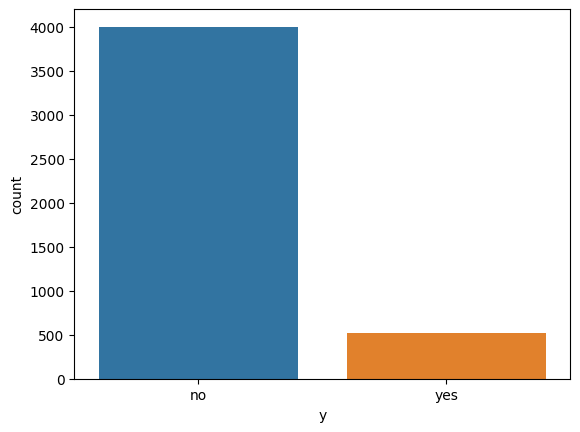

In [252]:
# 결과 변수의 label 균형 확인
sns.countplot(data=df, x="y", palette="tab10")

# 라벨 균형이 맞지 않는다. 라벨 불균형을 해결할 필요가 있다.

In [253]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

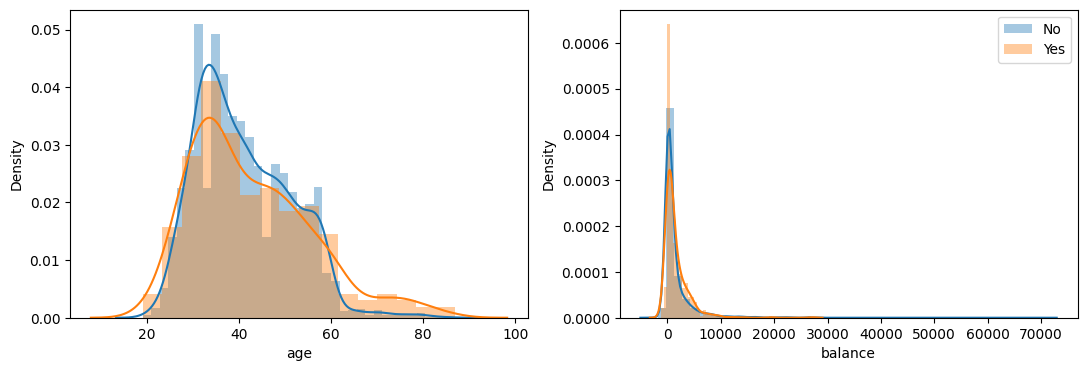

In [254]:
### 수치형 변수 시각화 ###
# label별 데이터프레임 생성
df_0 = df[df["y"]=="no"]
df_1 = df[df["y"]=="yes"]

# 시각화할 수치형 컬럼 리스트에 담기
cols = []
cols.extend([df.columns[1], df.columns[6]])
cols

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
for i, col_name in enumerate(cols):
  col = i
  sns.distplot(df_0[col_name], ax=axes[col], label="No")
  sns.distplot(df_1[col_name], ax=axes[col], label="Yes")

plt.legend()
plt.show()

In [255]:
'''
1) age
- 나이와 정기 예금 가입 여부는 크게 차이가 없는 듯 보이지만,
- 약 30세~58세까지는 정기 예금에 가입하지 않은 고객이 더 많은 경향이 있다.
- 약 58세 이후에는 정기 예금에 가입한 고객이 더 많다.

2) balance
- 데이터 분포가 한 쪽으로 치우쳐져 있다. => 이상치가 있는 것으로 의심된다.
- 이상치를 제거한 후 다시 그래프를 그려볼 것
'''

'\n1) age\n- 나이와 정기 예금 가입 여부는 크게 차이가 없는 듯 보이지만,\n- 약 30세~58세까지는 정기 예금에 가입하지 않은 고객이 더 많은 경향이 있다.\n- 약 58세 이후에는 정기 예금에 가입한 고객이 더 많다.\n\n2) balance\n- 데이터 분포가 한 쪽으로 치우쳐져 있다. => 이상치가 있는 것으로 의심된다.\n- 이상치를 제거한 후 다시 그래프를 그려볼 것\n'

<Axes: xlabel='balance'>

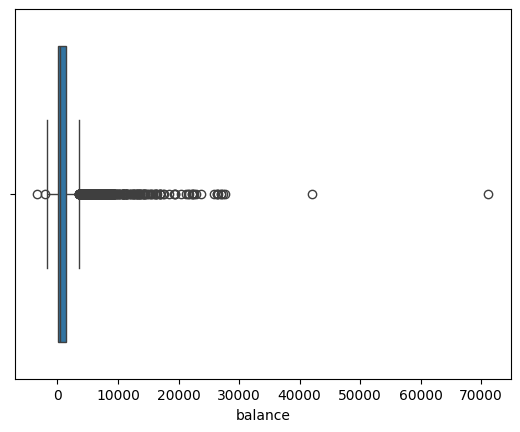

In [256]:
sns.boxplot(x=df["balance"]) # balance의 상자 그래프

In [257]:
IQR3 = df["balance"].quantile(0.75)
IQR1 = df["balance"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

1411.0

In [258]:
OUT = IQR3 + (IQR * 1.5)
OUT # balance의 이상치 기준

# 이 기준에 맞춰서 데이터를 제거하기엔 너무 많으므로,
# balance>40000인 데이터만 제거하기로 한다.

3596.5

In [259]:
df[df["balance"]>40000] # 이상치의 데이터 번호

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2989,2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,8,205,2,-1,0,unknown,no
3700,3700,60,retired,married,primary,no,71188,no,no,cellular,6,10,205,1,-1,0,unknown,no


In [260]:
df_new = df.copy()
df_new = df_new[df_new["balance"]<40000]
df_new.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1943,1943,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no
4160,4160,57,retired,married,secondary,no,1044,no,no,telephone,11,1,585,1,192,2,success,yes
1177,1177,28,self-employed,single,tertiary,no,4579,no,no,cellular,12,1,409,2,-1,0,unknown,yes
1681,1681,65,unknown,married,unknown,no,300,no,no,cellular,12,1,105,1,-1,0,unknown,no
2049,2049,59,technician,married,primary,no,4198,no,no,cellular,14,1,309,1,91,10,success,yes


<Axes: xlabel='balance'>

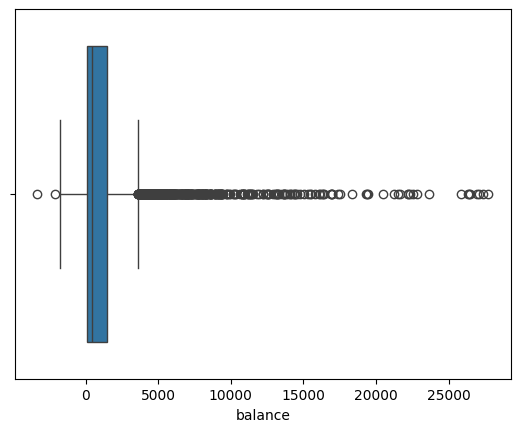

In [261]:
sns.boxplot(x=df_new["balance"]) # balance의 이상치를 제거한 후의 상자 그래프

In [262]:
# *balance가 3596.5 이상인 값에 대해 파생변수를 만들면 도움이 될 것으로 예상된다.

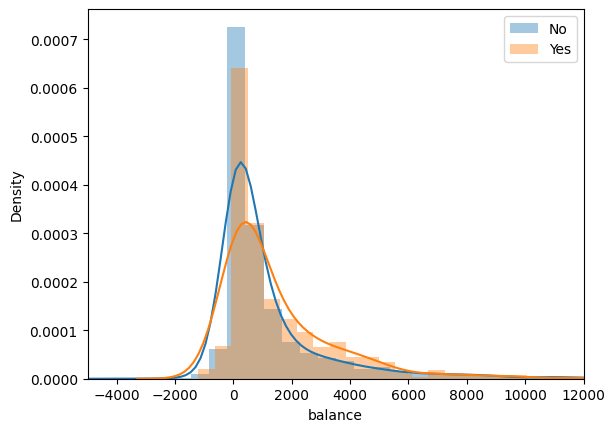

In [263]:
df_0 = df_new[df_new["y"]=="no"]
df_1 = df_new[df_new["y"]=="yes"]

plt.xlim(-5000, 12000)
sns.distplot(df_0["balance"], label="No")
sns.distplot(df_1["balance"], label="Yes")

plt.legend()
plt.show()

# balance가 약 0~500 사이일 때 정기예금을 신청하지 않는 빈도가 신청한 빈도에 비해 높다.
# 1200 이후로는 정기예금을 신청한 빈도가 상대적으로 더 높다.
# * balance: 연간 평균 잔고
# * 그래프가 한쪽으로 치우쳐져 있다. 로그변환 고려.

<Axes: xlabel='y', ylabel='balance'>

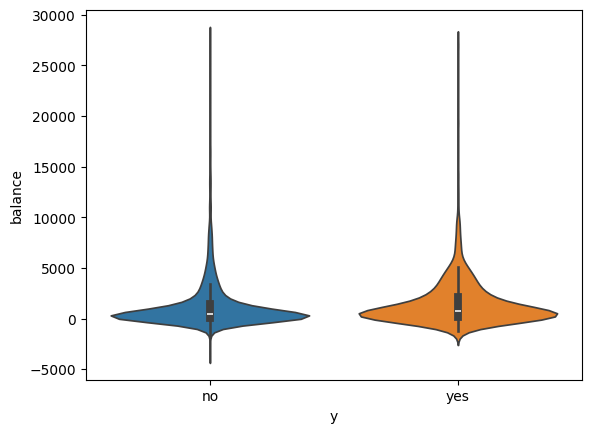

In [264]:
sns.violinplot(x="y", y="balance", data=df_new, palette="tab10")

In [265]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

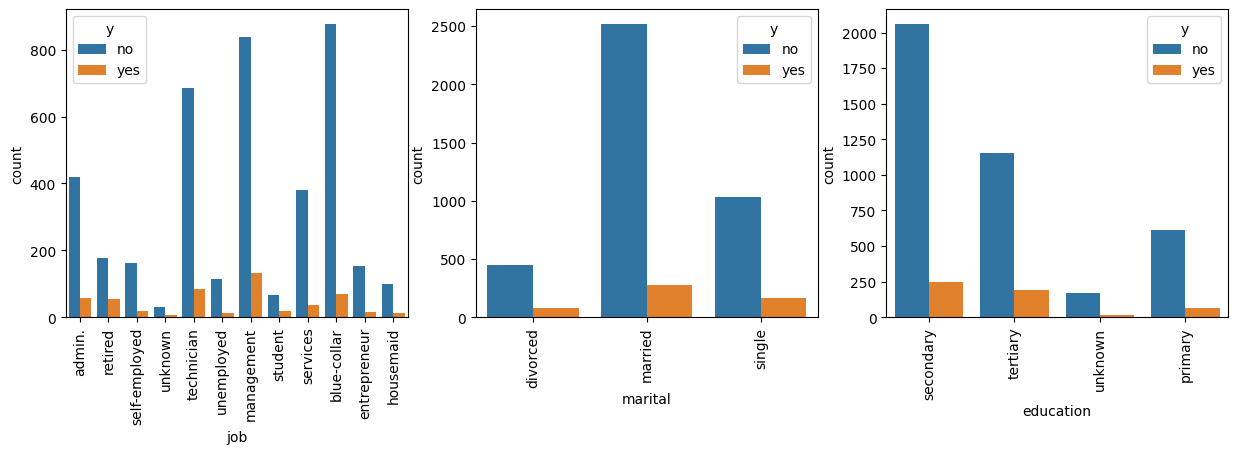

In [266]:
### 범주형 변수 시각화 ###
# 1. 고객 개인 정보 (직업, 결혼 여부, 교육 수준)
cols = []
cols.extend([df.columns[2], df.columns[3], df.columns[4]])
cols

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, col_name in enumerate(cols):
    col = i
    sns.countplot(data=df, x=col_name, hue="y", ax=axes[col], palette="tab10")
    axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=90)

plt.show()

In [267]:
'''
1) job
- 전체적인 수는 management와 bule-collar에 종사하는 고객의 수가 가장 많다.
- 그 다음으론 technician, admin.에 종사하는 고객의 수가 많은 편이다.
- 무직이거나 자영업, 기업가, 학생, 가정부, 은퇴한 고객의 수는 상대적으로 적은 편이다
- 수입이 없을 것으로 예상되는 무직, 학생 고객도 정기예금을 신청한 경우가 있다.
- 모든 직업군에서 공통적으로 정기예금을 신청하지 않은 사람의 수가 더 많다.
- * 같은 직업군 내에서 정기예금을 신청한 비율에 대한 파생변수를 추가하여 분석하면 도움이 될 것으로 예상된다.

2) martial
- 결혼한 고객의 수가 가장 많다.
- 기혼 > 미혼 > 이혼 순으로 고객의 수가 많다.
- 결혼 여부와 상관없이, 공통적으로 정기예금을 신청하지 않은 사람의 수가 더 많다.

3) education
- secondary(중고등졸) 학력에 해당하는 고객들이 가장 많다.
- secondary > teritary(대졸) > primary (초졸) 순으로 고객의 수가 많다.
- secondary와 teritary의 정기예금 신청 빈도가 비슷한 데 반해, secondary가 정기예금을 신청하지 않은 빈도가 더 많다.
- -> teritary의 정기예금 신청 비율이 secondary에 비해 더 높다.
'''

'\n1) job\n- 전체적인 수는 management와 bule-collar에 종사하는 고객의 수가 가장 많다.\n- 그 다음으론 technician, admin.에 종사하는 고객의 수가 많은 편이다.\n- 무직이거나 자영업, 기업가, 학생, 가정부, 은퇴한 고객의 수는 상대적으로 적은 편이다\n- 수입이 없을 것으로 예상되는 무직, 학생 고객도 정기예금을 신청한 경우가 있다.\n- 모든 직업군에서 공통적으로 정기예금을 신청하지 않은 사람의 수가 더 많다.\n- * 같은 직업군 내에서 정기예금을 신청한 비율에 대한 파생변수를 추가하여 분석하면 도움이 될 것으로 예상된다.\n\n2) martial\n- 결혼한 고객의 수가 가장 많다.\n- 기혼 > 미혼 > 이혼 순으로 고객의 수가 많다.\n- 결혼 여부와 상관없이, 공통적으로 정기예금을 신청하지 않은 사람의 수가 더 많다.\n\n3) education\n- secondary(중고등졸) 학력에 해당하는 고객들이 가장 많다.\n- secondary > teritary(대졸) > primary (초졸) 순으로 고객의 수가 많다.\n- secondary와 teritary의 정기예금 신청 빈도가 비슷한 데 반해, secondary가 정기예금을 신청하지 않은 빈도가 더 많다.\n- -> teritary의 정기예금 신청 비율이 secondary에 비해 더 높다.\n'

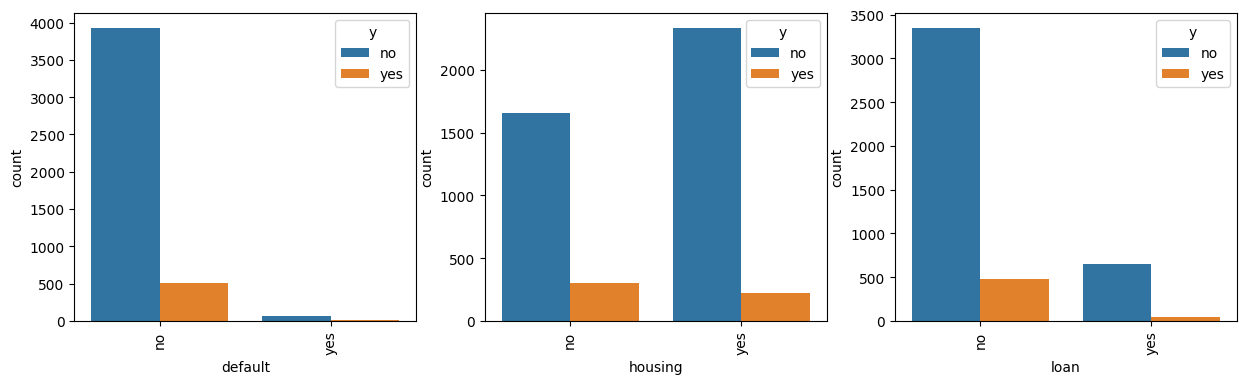

In [268]:
### 범주형 변수 시각화 ###
# 2. 고객의 금융 관련 정보 (신용불이행 여부, 주택 대출 여부, 개인 대출 여부)
cols = []
cols.extend([df.columns[5], df.columns[7], df.columns[8]])
cols

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, col_name in enumerate(cols):
    col = i
    sns.countplot(data=df, x=col_name, hue="y", ax=axes[col], palette="tab10")
    axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=90)

plt.show()

In [269]:
'''
1) default
- 신용불이행 고객의 수는 매우 적으며, 신용불이행이 아닌 고객의 수가 대부분이다.
- 신용불이행 고객들 중에도 정기예금을 신청한 경우가 있다.
- 신용불이행 여부에 상관없이, 공통적으로 정기예금을 신청하지 않은 빈도가 더 높다.

2) housing
- 주택 대출을 한 고객이 하지 않은 고객보다 많다.
- 정기예금을 신청한 빈도는 두 경우 모두 비슷함에도, 주택 대출을 한 고객의 수가 더 많은 것으로 보아
- 주택 대출을 하지 않은 집단이 그렇지 않은 집단보다 정기예금을 신청한 비율이 더 높다.
- 주택 대출 여부에 상관없이, 공통적으로 정기예금을 신청하지 않은 빈도가 더 높다.

3) loan
- 개인 대출을 하지 않은 고객이 대출을 한 고객보다 약 5배 이상 많다.
- 개인 대출을 한 고객 중, 정기예금을 신청한 비율이 매우 적어 보인다.
-  개인 대출 여부에 상관없이, 공통적으로 정기예금을 신청하지 않은 빈도가 더 높다.
'''

'\n1) default\n- 신용불이행 고객의 수는 매우 적으며, 신용불이행이 아닌 고객의 수가 대부분이다.\n- 신용불이행 고객들 중에도 정기예금을 신청한 경우가 있다.\n- 신용불이행 여부에 상관없이, 공통적으로 정기예금을 신청하지 않은 빈도가 더 높다.\n\n2) housing\n- 주택 대출을 한 고객이 하지 않은 고객보다 많다.\n- 정기예금을 신청한 빈도는 두 경우 모두 비슷함에도, 주택 대출을 한 고객의 수가 더 많은 것으로 보아\n- 주택 대출을 하지 않은 집단이 그렇지 않은 집단보다 정기예금을 신청한 비율이 더 높다.\n- 주택 대출 여부에 상관없이, 공통적으로 정기예금을 신청하지 않은 빈도가 더 높다.\n\n3) loan\n- 개인 대출을 하지 않은 고객이 대출을 한 고객보다 약 5배 이상 많다.\n- 개인 대출을 한 고객 중, 정기예금을 신청한 비율이 매우 적어 보인다.\n-  개인 대출 여부에 상관없이, 공통적으로 정기예금을 신청하지 않은 빈도가 더 높다.\n'

##### 현재 캠페인 데이터

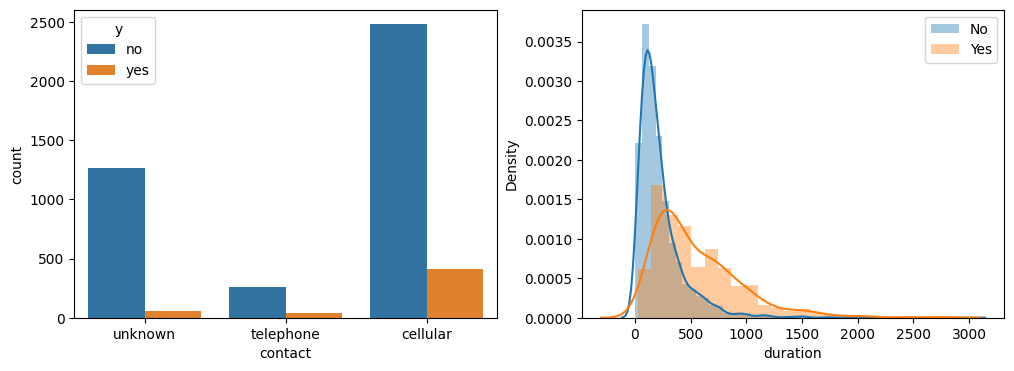

In [270]:
## contact 수단, 마지막 contact 기간의 길이 (초 단위)
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.countplot(data=df, x="contact", hue="y", palette="tab10")

plt.subplot(122)
sns.distplot(df_0["duration"], label="No")
sns.distplot(df_1["duration"], label="Yes")
plt.legend()

plt.show()

<Axes: xlabel='y', ylabel='duration'>

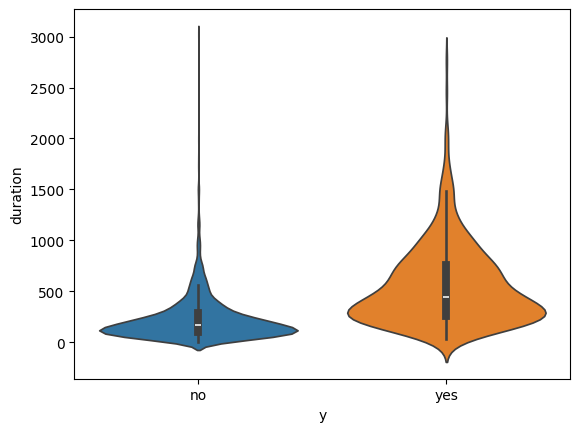

In [271]:
sns.violinplot(x="y", y="duration", data=df, palette="tab10")

In [272]:
'''
1) contact
- cellular(휴대전화)로 contact한 빈도가 가장 많다.
- cellular > unknown contact > telephone(집전화) 순으로 contact 빈도가 높다.
- contact 수단에 상관없이, 공통적으로 정기예금을 신청하지 않은 고객이 더 많다.
- contact 수단을 알 수 없는 경우가 상당히 많다 -> * 결측치 처리 필요

2) duration
- 분포가 옆으로 치우쳐져 있다. -> * 로그변환 고려
- duration이 약 300 이상일 땐 정기예금을 신청한 고객이 더 많다.
- duration이 약 300 미만일 땐 정기예금을 신청하지 않은 고객이 더 많다.
- 정기예금을 신청한 경우, 신청하지 않은 집단에 비해 duration이 500~1500 사이에 더 분포해 있다.
- -> 정기예금을 신청한 경우 duration의 범위가 넓다.
- * 파생변수 고려
'''

'\n1) contact\n- cellular(휴대전화)로 contact한 빈도가 가장 많다.\n- cellular > unknown contact > telephone(집전화) 순으로 contact 빈도가 높다.\n- contact 수단에 상관없이, 공통적으로 정기예금을 신청하지 않은 고객이 더 많다.\n- contact 수단을 알 수 없는 경우가 상당히 많다 -> * 결측치 처리 필요\n\n2) duration\n- 분포가 옆으로 치우쳐져 있다. -> * 로그변환 고려\n- duration이 약 300 이상일 땐 정기예금을 신청한 고객이 더 많다.\n- duration이 약 300 미만일 땐 정기예금을 신청하지 않은 고객이 더 많다.\n- 정기예금을 신청한 경우, 신청하지 않은 집단에 비해 duration이 500~1500 사이에 더 분포해 있다.\n- -> 정기예금을 신청한 경우 duration의 범위가 넓다.\n- * 파생변수 고려\n'

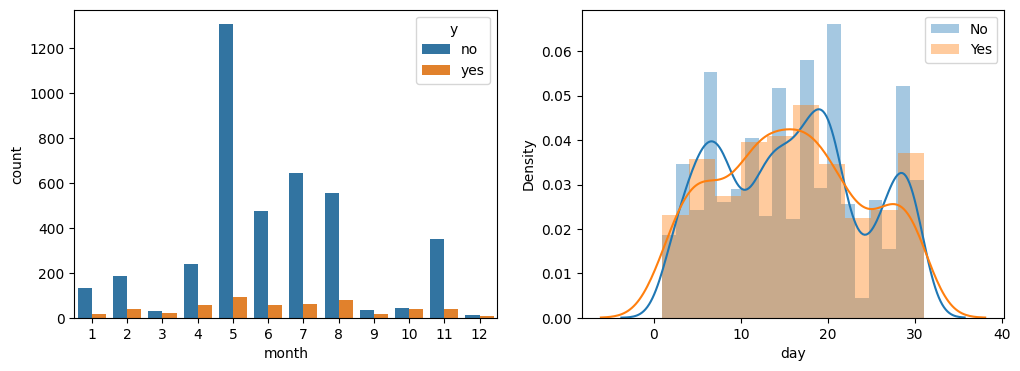

In [273]:
## 해당 달의 마지막 접촉일자, 해당 연도에 마지막으로 접촉한 달
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.countplot(data=df, x="month", hue="y", palette="tab10")

plt.subplot(122)
#sns.lineplot(data=df, x='day', y = 'y')
sns.distplot(df_0["day"], label="No")
sns.distplot(df_1["day"], label="Yes")
plt.legend()

plt.show()

In [274]:
'''
1) Month & day
- 5월에 contact한 고객이 가장 많았다.
- 4월~8월, 11월에 고객의 contact이 몰려 있는 양상을 보인다.
'''

'\n1) Month & day\n- 5월에 contact한 고객이 가장 많았다.\n- 4월~8월, 11월에 고객의 contact이 몰려 있는 양상을 보인다.\n'

In [275]:
df["day"].unique()

array([ 7, 11, 12, 14, 15, 18, 25, 26, 27, 28, 29, 30,  2,  3,  4,  5,  6,
        8,  9, 10, 13, 16, 17, 19, 23, 24, 22, 31,  1, 20, 21])

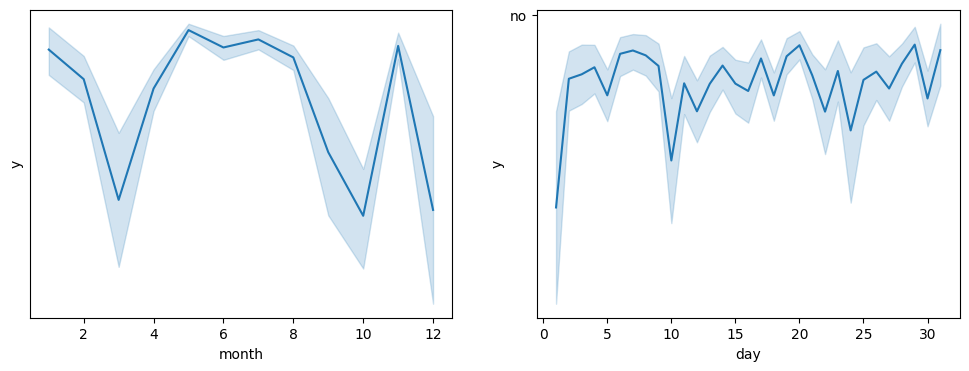

In [276]:
## time-series plot
plt.figure(figsize=(12, 4))

# month
plt.subplot(121)
sns.lineplot(data=df, x='month', y = 'y')

# day
plt.subplot(122)
sns.lineplot(data=df, x='day', y = 'y')

plt.show()

In [277]:
# month 데이터의 자기상관성(autocorrelation) 분석
import statsmodels.api as sm
sm.tsa.acf(df["month"])
# -> 자기상관성이 있다. (해결 필요)
# https://www.statology.org/autocorrelation-python/

array([1.        , 0.99859744, 0.99719488, 0.99579232, 0.99438975,
       0.99298719, 0.99158463, 0.99018207, 0.98877951, 0.98737695,
       0.98597439, 0.98457183, 0.98316926, 0.9817667 , 0.98036414,
       0.97896158, 0.97755902, 0.97615646, 0.9747539 , 0.97335134,
       0.97194877, 0.97077436, 0.96959994, 0.96842552, 0.9672511 ,
       0.96607668, 0.96490227, 0.96372785, 0.96255343, 0.96137901,
       0.96020459, 0.95903018, 0.95785576, 0.95668134, 0.95550692,
       0.9543325 , 0.95315809])

In [278]:
sm.tsa.acf(df["day"]) # day도 상당한 자기상관성이 있어 보인다.

array([1.        , 0.98422761, 0.96895552, 0.95385554, 0.93894447,
       0.92457059, 0.91074664, 0.89760921, 0.88515561, 0.87255184,
       0.86056305, 0.8490835 , 0.83865232, 0.8282794 , 0.81891146,
       0.81038589, 0.80208798, 0.79431425, 0.78663484, 0.77885516,
       0.77144653, 0.76286285, 0.75456539, 0.74618011, 0.73802249,
       0.73024298, 0.72259411, 0.71509811, 0.70780485, 0.70044004,
       0.69359886, 0.68666662, 0.67993602, 0.67359245, 0.66745704,
       0.66138667, 0.65566756])

In [279]:
'''
1) Month
- 규칙성이 있는 것으로 보인다.
- 왜 3월과 10월에는 contact하는 고객의 수가 특히 적은가?
- 왜 3월부터 5월까지 contact이 급격히 증가하고, 8월부터 10월까지 contact이 급격히 감소하는가?
- > 정기예금 약정 때문에?
- time series plot만 보면 고객들이 늘어나는 것처럼 보이지만,
- 정기예금을 신청 여부와는 큰 상관이 없다.

2) Day
- 특별한 규칙성은 없는 것으로 보인다.
'''

'\n1) Month\n- 규칙성이 있는 것으로 보인다.\n- 왜 3월과 10월에는 contact하는 고객의 수가 특히 적은가?\n- 왜 3월부터 5월까지 contact이 급격히 증가하고, 8월부터 10월까지 contact이 급격히 감소하는가?\n- > 정기예금 약정 때문에?\n- time series plot만 보면 고객들이 늘어나는 것처럼 보이지만,\n- 정기예금을 신청 여부와는 큰 상관이 없다.\n\n2) Day\n- 특별한 규칙성은 없는 것으로 보인다.\n'

##### 기타 특성 데이터

<Axes: xlabel='campaign', ylabel='Density'>

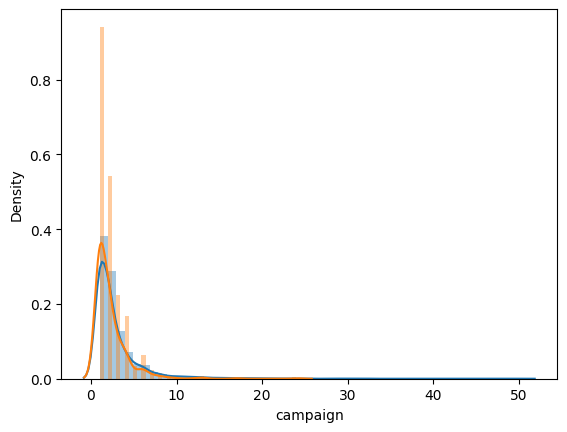

In [280]:
#### campaign 변수
sns.distplot(df_0["campaign"], label="No")
sns.distplot(df_1["campaign"], label="Yes")

# 그래프가 굉장히 치우쳐져 있다. 이상치가 있나?

<Axes: xlabel='campaign'>

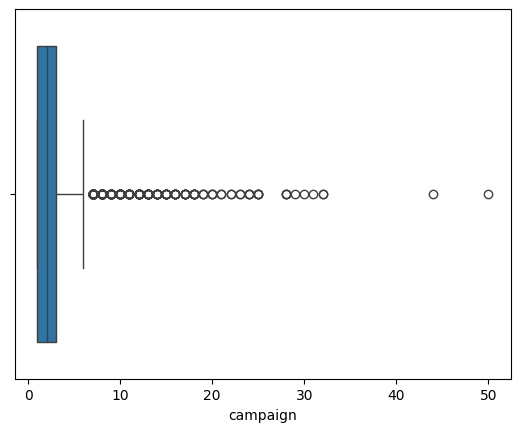

In [281]:
sns.boxplot(x=df["campaign"]) # campaign의 상자 그래프

In [282]:
IQR3 = df["campaign"].quantile(0.75)
IQR1 = df["campaign"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

2.0

In [283]:
OUT = IQR3 + (IQR * 1.5)
OUT # campaign의 이상치 기준

6.0

<Axes: xlabel='y', ylabel='campaign'>

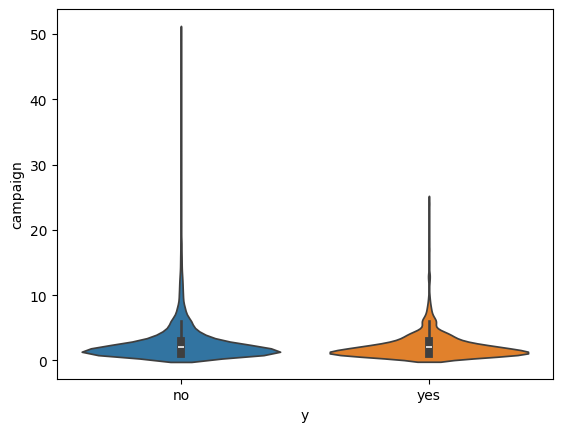

In [284]:
sns.violinplot(x="y", y="campaign", data=df, palette="tab10")

# 해당 데이터에서, campaign>25인 고객은 모두 정기예금을 신청하지 않은 고객이다.
# campaign>25인 고객은 모두 정기예금을 신청하지 않은 고객이므로, 유의미한 정보이다.
# 그러므로 다음 값들은 제거하지 않는다.
# * 파생변수 고려

<Axes: xlabel='campaign', ylabel='Density'>

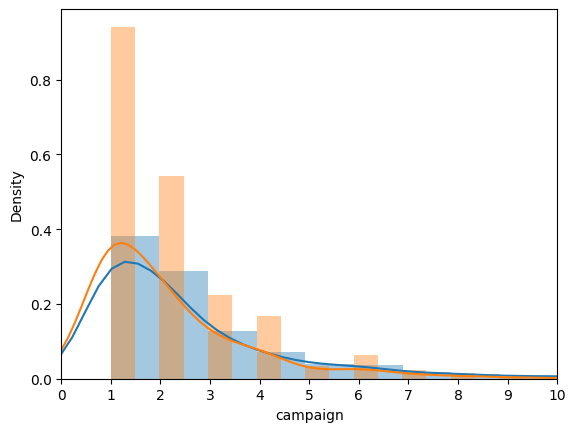

In [285]:
df_0 = df_new[df_new["y"]=="no"]
df_1 = df_new[df_new["y"]=="yes"]

plt.xlim(0, 10)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sns.distplot(df_0["campaign"], label="No")
sns.distplot(df_1["campaign"], label="Yes")

In [286]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

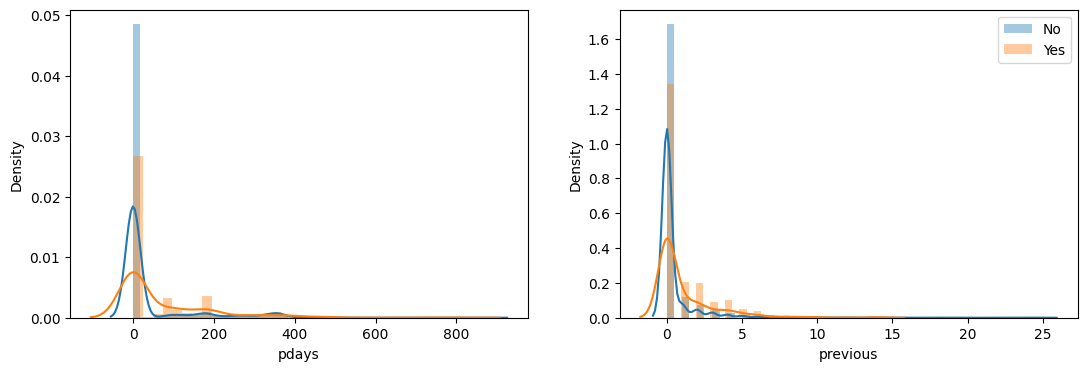

In [287]:
# pdays, previous 변수
cols = []
cols.extend(["pdays", "previous"])
cols

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
for i, col_name in enumerate(cols):
  col = i
  sns.distplot(df_0[col_name], ax=axes[col], label="No")
  sns.distplot(df_1[col_name], ax=axes[col], label="Yes")

plt.legend()
plt.show()

# 둘 다 그래프가 치우져져 있다. 이상치가 의심된다.

<Axes: xlabel='previous'>

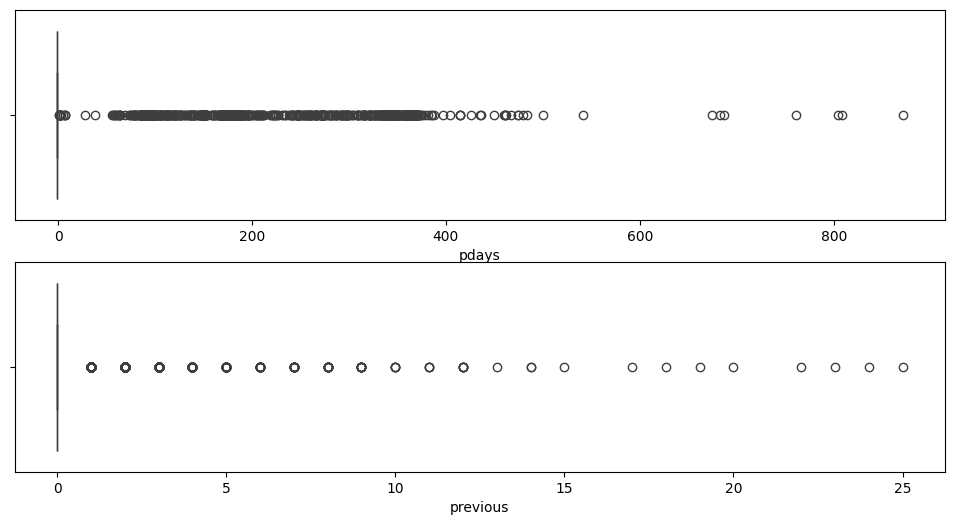

In [288]:
plt.figure(figsize=[12, 6])

plt.subplot(211)
sns.boxplot(x=df_new["pdays"])

plt.subplot(212)
sns.boxplot(x=df_new["previous"])

In [289]:
IQR3 = df["previous"].quantile(0.75)
IQR1 = df["previous"].quantile(0.25)
IQR = IQR3 - IQR1
OUT = IQR + 1.5*IQR3
OUT

# previous의 이상치 기준은 previous가 0 이상일 때이다.
# previous는 사실상 categorical 변수이다.

0.0

<Axes: xlabel='y', ylabel='previous'>

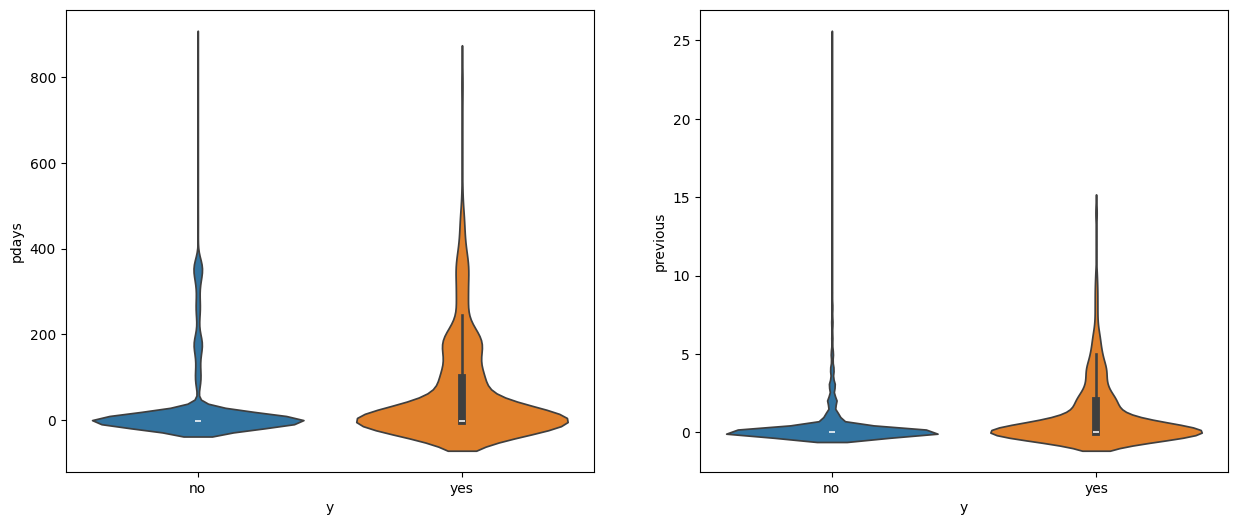

In [290]:
plt.figure(figsize=[15, 6])

plt.subplot(121)
sns.violinplot(x="y", y="pdays", data=df_new, palette="tab10")

plt.subplot(122)
sns.violinplot(x="y", y="previous", data=df_new, palette="tab10")

In [291]:
'''
상자 그림과 바이올린 그림을 고려했을 때,
pdays > 600인 값과 previous > 15인 값을 제거하는 것이 적절해 보인다.
하지만, previous의 경우에는 previous > 15인 경우 모두 정기예금에 가입하지 않은 고객이므로,
분류에 유용한 정보가 될 것으로 보인다.
그러므로 pdays의 결측치만 제거한다.
*previous 파생변수 고려
'''

'\n상자 그림과 바이올린 그림을 고려했을 때,\npdays > 600인 값과 previous > 15인 값을 제거하는 것이 적절해 보인다.\n하지만, previous의 경우에는 previous > 15인 경우 모두 정기예금에 가입하지 않은 고객이므로,\n분류에 유용한 정보가 될 것으로 보인다.\n그러므로 pdays의 결측치만 제거한다.\n*previous 파생변수 고려\n'

In [292]:
df_new = df_new[(df_new["pdays"]<600)]
df_new.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1943,1943,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no
4160,4160,57,retired,married,secondary,no,1044,no,no,telephone,11,1,585,1,192,2,success,yes
1177,1177,28,self-employed,single,tertiary,no,4579,no,no,cellular,12,1,409,2,-1,0,unknown,yes
1681,1681,65,unknown,married,unknown,no,300,no,no,cellular,12,1,105,1,-1,0,unknown,no
2049,2049,59,technician,married,primary,no,4198,no,no,cellular,14,1,309,1,91,10,success,yes


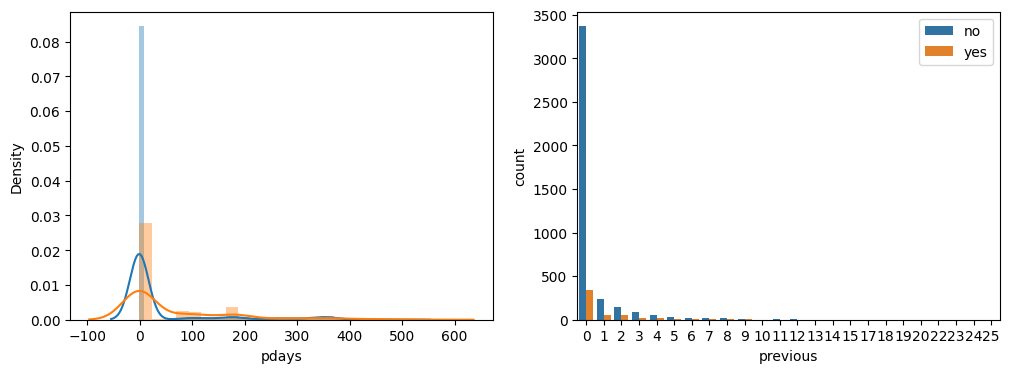

In [293]:
plt.figure(figsize=(12, 4))

df_0 = df_new[df_new["y"]=="no"]
df_1 = df_new[df_new["y"]=="yes"]

plt.subplot(121)
sns.distplot(df_0["pdays"], label="No")
sns.distplot(df_1["pdays"], label="Yes")

plt.subplot(122)
sns.countplot(data=df_new, x="previous", hue="y", palette="tab10")
plt.legend()

plt.show()

In [294]:
'''
1) pdays
- 정기예금을 신청하지 않은 경우, pdays가 0인 경우가 압도적으로 많다.
- pdays가 0을 넘어선 경우, 정기예금을 신청한 경우가 더 많다.
- -> *파생변수 고려

2) previous
- 정기예금을 신청하지 않은 경우, previous가 0인 경우가 대부분이다.
- previous와 관계없이, 모든 경우에서 정기예금을 신청하지 않은 고객이 신청한 고객보다 많다.
'''

'\n1) pdays\n- 정기예금을 신청하지 않은 경우, pdays가 0인 경우가 압도적으로 많다.\n- pdays가 0을 넘어선 경우, 정기예금을 신청한 경우가 더 많다.\n- -> *파생변수 고려\n\n2) previous\n- 정기예금을 신청하지 않은 경우, previous가 0인 경우가 대부분이다.\n- previous와 관계없이, 모든 경우에서 정기예금을 신청하지 않은 고객이 신청한 고객보다 많다.\n'

<Axes: xlabel='poutcome', ylabel='count'>

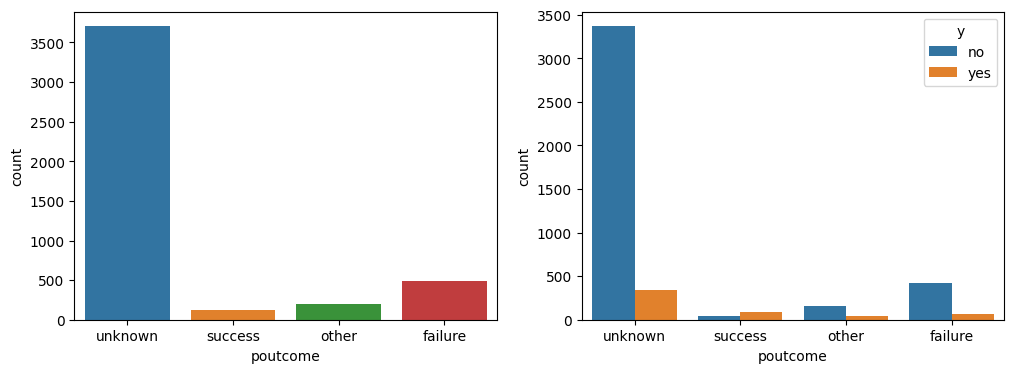

In [295]:
# poutcome (이전 캠페인의 성공 여부)
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.countplot(data=df_new, x="poutcome", palette="tab10")

plt.subplot(122)
sns.countplot(data=df_new, x="poutcome", hue="y")

# 이전 캠페인의 성공 여부를 모르는 경우가 대부분이다. --> 이게 모두 결측치
# 성공한 case보다 실패한 case가 더 많다.
# ?: other는 어떤 것을 의미하는가? -> 이전 캠페인에 참여한 적 없는 신규 고객을 의미하는 것인가?

In [296]:
'''
#poutcome#
1) unknown의 경우:
- 이전 캠페인의 결과를 알지 못하는 고객의 경우, 정기예금을 신청하지 않은 고객이 훨씬 더 많다.
2) success의 경우:
- 이전 캠페인에서 마케팅에 성공한 고객의 경우, 정기예금을 신청한 고객이 더 많다.
3) other의 경우:
- 이전 캠페인에서 마케팅 성과가 other인 경우, 정기예금을 신청하지 않은 고객이 더 많다.
4) failure의 경우:
- 이전 캠페인에서 마케팅에 실패한 고객의 경우, 이번에도 정기예금을 신청하지 않은 고객이 더 많다.

=> 결론: 정기예금 신청 여부는 이전 캠페인의 성패와 비슷한 흐름이다.
'''

'\n#poutcome#\n1) unknown의 경우:\n- 이전 캠페인의 결과를 알지 못하는 고객의 경우, 정기예금을 신청하지 않은 고객이 훨씬 더 많다.\n2) success의 경우:\n- 이전 캠페인에서 마케팅에 성공한 고객의 경우, 정기예금을 신청한 고객이 더 많다.\n3) other의 경우:\n- 이전 캠페인에서 마케팅 성과가 other인 경우, 정기예금을 신청하지 않은 고객이 더 많다.\n4) failure의 경우:\n- 이전 캠페인에서 마케팅에 실패한 고객의 경우, 이번에도 정기예금을 신청하지 않은 고객이 더 많다.\n\n=> 결론: 정기예금 신청 여부는 이전 캠페인의 성패와 비슷한 흐름이다.\n'

##### 변수간의 상관관계

In [297]:
dfc = df_new.copy()
dfc = dfc.drop(["ID"], axis=1)
dfc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1943,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no
4160,57,retired,married,secondary,no,1044,no,no,telephone,11,1,585,1,192,2,success,yes
1177,28,self-employed,single,tertiary,no,4579,no,no,cellular,12,1,409,2,-1,0,unknown,yes
1681,65,unknown,married,unknown,no,300,no,no,cellular,12,1,105,1,-1,0,unknown,no
2049,59,technician,married,primary,no,4198,no,no,cellular,14,1,309,1,91,10,success,yes


In [298]:
df_corr = dfc.corr()
df_corr

,age,balance,day,month,duration,campaign,pdays,previous
age,1.000000,0.080964,-0.016760,0.072677,-0.001792,-0.004767,-0.014464,-0.003184
balance,0.080964,1.000000,-0.000019,0.097570,-0.015466,-0.007015,0.014964,0.032670
day,-0.016760,-0.000019,1.000000,0.082149,-0.025918,0.160217,-0.092048,-0.056836
month,0.072677,0.097570,0.082149,1.000000,0.000309,0.060256,-0.127938,-0.040734
duration,-0.001792,-0.015466,-0.025918,0.000309,1.000000,-0.068390,0.010102,0.018326
campaign,-0.004767,-0.007015,0.160217,0.060256,-0.068390,1.000000,-0.091610,-0.066581
pdays,-0.014464,0.014964,-0.092048,-0.127938,0.010102,-0.091610,1.000000,0.582519
previous,-0.003184,0.032670,-0.056836,-0.040734,0.018326,-0.066581,0.582519,1.000000


<Axes: >

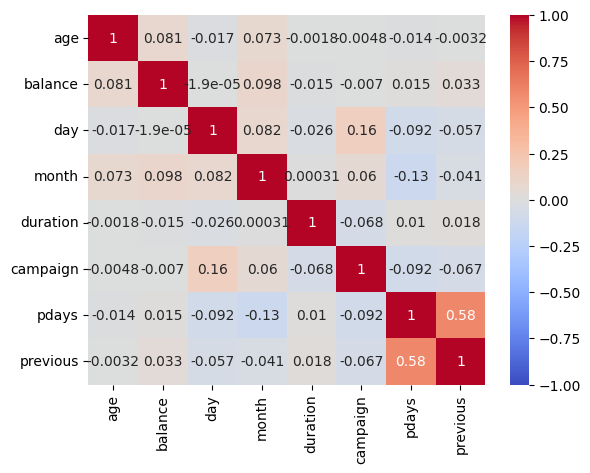

In [299]:
sns.heatmap(df_corr, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
# previous와 pdays가 어느 정도의 상관관계가 있고, 나머지 변수들끼리는 상관관계가 거의 없다.

#### 결측치 다루기

In [300]:
# pip install scikit-learn == 1.2.2 # 특정 버전 설치 (이 파일은 해당 버전으로 실행되었음)

In [301]:
# pip install -U scikit-learn # 최신버전 설치

In [302]:
df_new["education"] = df["education"].replace("unknown", pd.np.nan)
df_new["job"] = df["job"].replace("unknown", pd.np.nan)

In [303]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df_new = pd.DataFrame(imputer.fit_transform(df_new), index=df_new.index)

In [304]:
df_new # education, job의 결측치 해결

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1943,1943,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no
4160,4160,57,retired,married,secondary,no,1044,no,no,telephone,11,1,585,1,192,2,success,yes
1177,1177,28,self-employed,single,tertiary,no,4579,no,no,cellular,12,1,409,2,-1,0,unknown,yes
1681,1681,65,management,married,secondary,no,300,no,no,cellular,12,1,105,1,-1,0,unknown,no
2049,2049,59,technician,married,primary,no,4198,no,no,cellular,14,1,309,1,91,10,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,629,59,management,married,tertiary,no,2764,no,no,cellular,24,12,237,1,206,2,failure,no
1478,1478,35,technician,single,tertiary,no,7546,yes,no,cellular,28,12,137,1,122,3,failure,no
328,328,35,unemployed,married,secondary,no,978,no,no,cellular,29,12,1370,3,209,3,success,yes
3633,3633,36,technician,married,tertiary,no,629,yes,yes,cellular,29,12,109,1,246,1,failure,no


In [305]:
df.info() # 원데이터의 데이터 타입

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 1943 to 1603
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4521 non-null   int64 
 1   age        4521 non-null   int64 
 2   job        4521 non-null   object
 3   marital    4521 non-null   object
 4   education  4521 non-null   object
 5   default    4521 non-null   object
 6   balance    4521 non-null   int64 
 7   housing    4521 non-null   object
 8   loan       4521 non-null   object
 9   contact    4521 non-null   object
 10  day        4521 non-null   int64 
 11  month      4521 non-null   int64 
 12  duration   4521 non-null   int64 
 13  campaign   4521 non-null   int64 
 14  pdays      4521 non-null   int64 
 15  previous   4521 non-null   int64 
 16  poutcome   4521 non-null   object
 17  y          4521 non-null   object
dtypes: int64(9), object(9)
memory usage: 800.1+ KB


In [306]:
df_new.info() # 결측치 보간 후 데이터타입이 모두 object로 바뀌었다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4512 entries, 1943 to 1603
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4512 non-null   object
 1   1       4512 non-null   object
 2   2       4512 non-null   object
 3   3       4512 non-null   object
 4   4       4512 non-null   object
 5   5       4512 non-null   object
 6   6       4512 non-null   object
 7   7       4512 non-null   object
 8   8       4512 non-null   object
 9   9       4512 non-null   object
 10  10      4512 non-null   object
 11  11      4512 non-null   object
 12  12      4512 non-null   object
 13  13      4512 non-null   object
 14  14      4512 non-null   object
 15  15      4512 non-null   object
 16  16      4512 non-null   object
 17  17      4512 non-null   object
dtypes: object(18)
memory usage: 798.8+ KB


In [307]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [308]:
# 컬럼 이름 변경
my_columns=['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome', 'y']

df_new.columns = my_columns

# 데이터타입 변경
list = ["ID", "age", "balance", "day", "month", "duration", "duration", "campaign", "pdays", "previous"]
for i in range(0, 9):
  df_new = df.astype({list[i]:"int64"})

df_new.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1943,1943,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no
4160,4160,57,retired,married,secondary,no,1044,no,no,telephone,11,1,585,1,192,2,success,yes
1177,1177,28,self-employed,single,tertiary,no,4579,no,no,cellular,12,1,409,2,-1,0,unknown,yes
1681,1681,65,unknown,married,unknown,no,300,no,no,cellular,12,1,105,1,-1,0,unknown,no
2049,2049,59,technician,married,primary,no,4198,no,no,cellular,14,1,309,1,91,10,success,yes


In [309]:
df_new.info() # 데이터 타입 변경 완료

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 1943 to 1603
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4521 non-null   int64 
 1   age        4521 non-null   int64 
 2   job        4521 non-null   object
 3   marital    4521 non-null   object
 4   education  4521 non-null   object
 5   default    4521 non-null   object
 6   balance    4521 non-null   int64 
 7   housing    4521 non-null   object
 8   loan       4521 non-null   object
 9   contact    4521 non-null   object
 10  day        4521 non-null   int64 
 11  month      4521 non-null   int64 
 12  duration   4521 non-null   int64 
 13  campaign   4521 non-null   int64 
 14  pdays      4521 non-null   int64 
 15  previous   4521 non-null   int64 
 16  poutcome   4521 non-null   object
 17  y          4521 non-null   object
dtypes: int64(9), object(9)
memory usage: 800.1+ KB


#### 로그변환

In [310]:
# campaign 변수를 로그변환
# (balance는 음수값이 있기 때문에, 로그변환을 하지 못했다.)
df_new["campaign_log"] = np.log(df_new["campaign"] + 1)

<Axes: xlabel='campaign_log', ylabel='Density'>

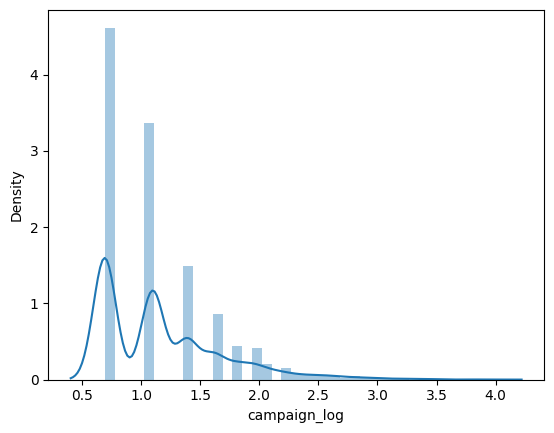

In [311]:
# 로그변환 후 campaign
sns.distplot(df_new["campaign_log"])

<Axes: xlabel='day_log', ylabel='y'>

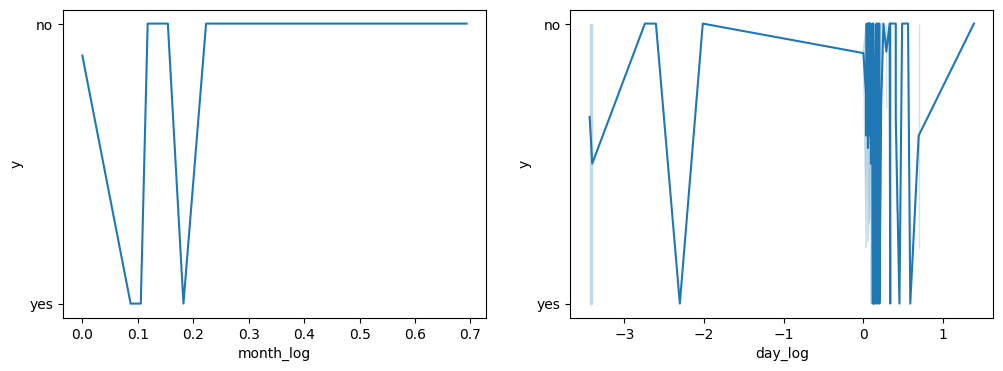

In [312]:
# 자기상관성을 해결하기 위해 로그변환 진행
df_new["month_log"] = np.log(df["month"]).diff()
df_new["month_log"].fillna(0, inplace=True)

df_new["day_log"] = np.log(df["day"]).diff()
df_new["day_log"].fillna(0, inplace=True)

# 로그변환 후 그래프
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.lineplot(data=df_new, x='month_log', y = 'y')

plt.subplot(122)
sns.lineplot(data=df_new, x='day_log', y = 'y')

#### 변수변환 및 파생변수

In [313]:
df_new["high_balance"] = df["balance"] > 1200 # balance > 1200인 경우 정기예금 신청 빈도가 더 높았음
df_new["high_duration"] = df["duration"] > 300 # duration > 300인 경우 정기예금 신청 빈도가 더 높았음
df_new["pdays_more_0"] = df["pdays"] > 0 # pdays > 0인 경우 정기예금 신청 빈도가 더 높았음

### 4. 피처 엔지니어링

#### One-hot-encoding

In [314]:
df_ohe = pd.get_dummies(df_new, drop_first=True)
df_ohe.head()

,ID,age,balance,day,month,duration,campaign,pdays,previous,campaign_log,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
1943,1943,40,212,7,1,176,1,-1,0,0.693147,...,0,0,0,0,0,1,0,0,1,0
4160,4160,57,1044,11,1,585,1,192,2,0.693147,...,0,0,0,0,1,0,0,1,0,1
1177,1177,28,4579,12,1,409,2,-1,0,1.098612,...,0,0,0,0,0,0,0,0,1,1
1681,1681,65,300,12,1,105,1,-1,0,0.693147,...,1,0,0,0,0,0,0,0,1,0
2049,2049,59,4198,14,1,309,1,91,10,0.693147,...,0,0,0,0,0,0,0,1,0,1


### 5. 학습, 예측 데이터셋 나누기

In [315]:
df_ohe.columns

Index(['ID', 'age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'campaign_log', 'month_log', 'day_log', 'high_balance',
       'high_duration', 'pdays_more_0', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_yes'],
      dtype='object')

In [316]:
X = df_ohe.drop(["y_yes", "ID", "month"], axis=1)
y = df_ohe["y_yes"]

In [359]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=84
)

#### 라벨 불균형 처리 (by SMOTE)

In [318]:
#!pip install -U imblearn

In [319]:
'''
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=84)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

### SMOTE 적용 후
pd.Series(y_train_over).value_counts()
'''

'\nfrom imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(random_state=84)\nX_train_over, y_train_over = smote.fit_resample(X_train, y_train)\n\n### SMOTE 적용 후\npd.Series(y_train_over).value_counts()\n'

In [320]:
# 학습 및 예측 단계에서 과적합 문제가 나타남.
# -> SMOTE를 사용하는 대신 원데이터를 사용하고, 평가 지표를 f1 score로 변경

#### 결측치 다루기 (범주형 변수)

In [321]:
#!git clone https://github.com/awslabs/datawig

In [322]:
#cd datawig

In [323]:
#pip install .

In [324]:
# 결측치가 있는 변수는 education, job, contact, poutcome이었다. (모두 범주형 변수)

In [325]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [326]:
'''
import datawig

imputer = datawig.SimpleImputer(
    input_columns=["age", "job", "martial", "balance"], # column(s) containing information about the column we want to impute
    output_column= "education", # the column we'd like to impute values for
    output_path = "imputer_model" # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=X_train_over, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(X_test)

# +) iterative imputer, KNN imputer
'''

'\nimport datawig\n\nimputer = datawig.SimpleImputer(\n    input_columns=["age", "job", "martial", "balance"], # column(s) containing information about the column we want to impute\n    output_column= "education", # the column we\'d like to impute values for\n    output_path = "imputer_model" # stores model data and metrics\n    )\n\n#Fit an imputer model on the train data\nimputer.fit(train_df=X_train_over, num_epochs=50)\n\n#Impute missing values and return original dataframe with predictions\nimputed = imputer.predict(X_test)\n\n# +) iterative imputer, KNN imputer\n'

#### 스케일링

In [362]:
from sklearn.preprocessing import RobustScaler # Robust Scaler 사용

rbs = RobustScaler()
#X_train_over = rbs.fit_transform(X_train_over)
X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)

### 6. 학습 및 예측



In [328]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#### 결정 트리

In [385]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [330]:
model_dt = DecisionTreeClassifier(random_state=84)
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [x for x in range(4, 8, 1)],
              'min_samples_split': [x for x in range(2, 20, 2)],
              'min_samples_leaf': [x for x in range(1, 20, 2)],
              'max_features': [0.8],
              'splitter': ['best', 'random']}

grid_model_dt = GridSearchCV(model_dt, param_grid = parameters, cv = 5)
grid_model_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_model_dt.cv_results_['params'])
result['mean_test_score'] = grid_model_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,splitter,mean_test_score
694,gini,7,0.8,17,12,best,0.900998
700,gini,7,0.8,17,18,best,0.900998
684,gini,7,0.8,17,2,best,0.900998
698,gini,7,0.8,17,16,best,0.900998
686,gini,7,0.8,17,4,best,0.900998
...,...,...,...,...,...,...,...
541,gini,7,0.8,1,2,random,0.884956
573,gini,7,0.8,3,16,random,0.884677
590,gini,7,0.8,5,16,best,0.884406
543,gini,7,0.8,1,4,random,0.883576


In [331]:
print('GridSearchCV 최적 파라미터:', grid_model_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_model_dt.best_score_)) # train_accuracy

GridSearchCV 최적 파라미터: {'criterion': 'gini', 'max_depth': 7, 'max_features': 0.8, 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'best'}
GridSearchCV 최고 정확도: 0.9010


In [332]:
model_dt = grid_model_dt.best_estimator_ # best parameter를 적용한 모델
model_dt.fit(X_train, y_train) # 모델 적합
y_predict = model_dt.predict(X_test) # 예측값
print('accuracy score: {0:.5f}'.format(accuracy_score(y_test, y_predict)))
f1=f1_score(y_test, y_predict)
print('f1 score: {0:.5f}'.format(f1))

accuracy score: 0.89171
f1 score: 0.40244


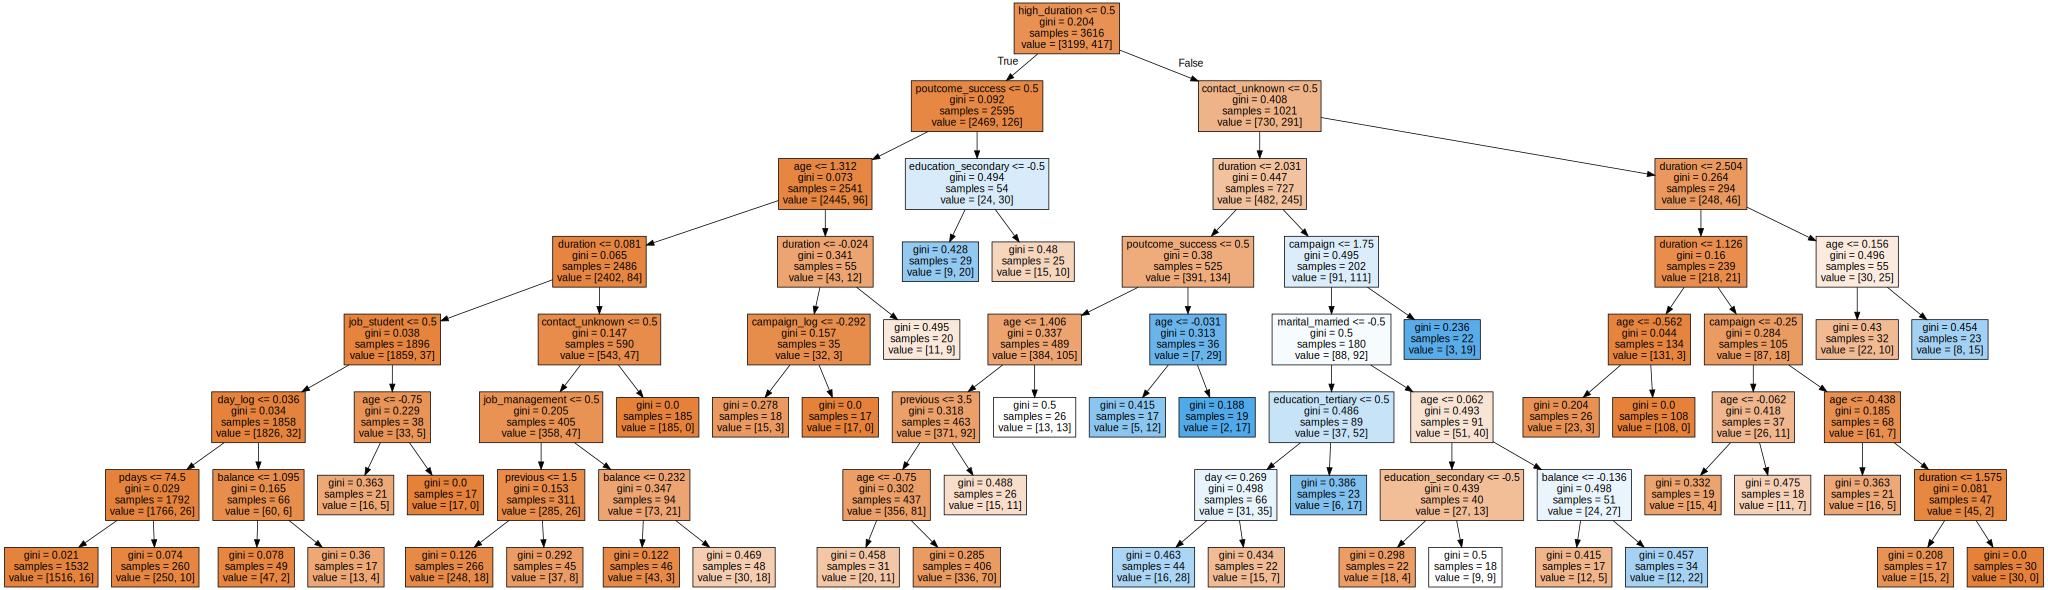

In [388]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = X.columns.tolist()
dot_tree = export_graphviz(model_dt,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

#### 랜덤 포레스트

In [364]:
from sklearn.ensemble import RandomForestClassifier

In [334]:
model_rf = RandomForestClassifier(random_state=84)
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [6, 8, 10, 12],
              'min_samples_split': [15, 20, 25],
              'min_samples_leaf': [1, 2, 3, 4],
              'n_estimators':[6, 8, 10 ,12]}

grid_model_rf = GridSearchCV(model_rf, param_grid = parameters, cv = 5)
grid_model_rf.fit(X_train, y_train)

result = pd.DataFrame(grid_model_rf.cv_results_['params'])
result['mean_test_score'] = grid_model_rf.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,criterion,max_depth,min_samples_leaf,min_samples_split,n_estimators,mean_test_score
114,gini,10,2,20,10,0.899892
58,gini,8,1,25,10,0.899614
75,gini,8,3,15,12,0.898786
155,gini,12,1,25,12,0.898785
124,gini,10,3,20,6,0.898506
...,...,...,...,...,...,...
244,entropy,8,1,20,6,0.887446
108,gini,10,2,15,6,0.887172
344,entropy,12,1,25,6,0.886893
256,entropy,8,2,20,6,0.886618


In [351]:
print('GridSearchCV 최적 파라미터:', grid_model_rf.best_params_)
print('GridSearchCV 최고 정확도: {0:.5f}'.format(grid_model_rf.best_score_))

GridSearchCV 최적 파라미터: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 10}
GridSearchCV 최고 정확도: 0.89989


In [360]:
model_rf = grid_model_rf.best_estimator_ # best parameter를 적용한 모델
model_rf.fit(X_train, y_train) # 모델 적합
y_predict = model_rf.predict(X_test) # 예측값
accuracy_score(y_test, y_predict)
print('accuracy score: {0:.5f}'.format(accuracy_score(y_test, y_predict)))
f1=f1_score(y_test, y_predict)
print('f1 score: {0:.5f}'.format(f1))

accuracy score: 0.88840
f1 score: 0.28369


<Axes: >

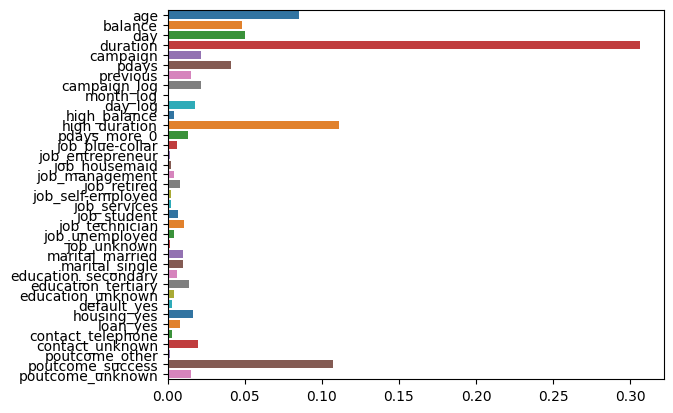

In [367]:
sns.barplot(x=model_rf.feature_importances_, y=model_rf.feature_names_in_, palette="tab10") # 피처 중요도

#### XGBoost

In [368]:
from xgboost import XGBClassifier

In [369]:
model_xgb = XGBClassifier(random_state=84)
parameters = {"n_estimators": [20, 30, 40],
              "max_depth": [1, 2, 3, 4],
              "gamma":[2, 3, 4]}

grid_model_xgb = GridSearchCV(model_xgb, param_grid = parameters, cv = 5)
grid_model_xgb.fit(X_train, y_train)

result = pd.DataFrame(grid_model_xgb.cv_results_['params'])
result['mean_test_score'] = grid_model_xgb.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,gamma,max_depth,n_estimators,mean_test_score
16,3,2,30,0.900721
17,3,2,40,0.900721
30,4,3,20,0.899060
35,4,4,40,0.898786
34,4,4,30,0.898786
33,4,4,20,0.898786
32,4,3,40,0.898508
31,4,3,30,0.898508
4,2,2,30,0.898233
7,2,3,30,0.897679


In [370]:
print('GridSearchCV 최적 파라미터:', grid_model_xgb.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_model_xgb.best_score_))

GridSearchCV 최적 파라미터: {'gamma': 3, 'max_depth': 2, 'n_estimators': 30}
GridSearchCV 최고 정확도: 0.9007


In [371]:
model_xgb = grid_model_xgb.best_estimator_ # best parameter를 적용한 모델
model_xgb.fit(X_train, y_train) # 모델 적합
y_predict = model_xgb.predict(X_test) # 예측값
print('accuracy score: {0:.5f}'.format(accuracy_score(y_test, y_predict)))
f1=f1_score(y_test, y_predict)
print('f1 score: {0:.5f}'.format(f1))

accuracy score: 0.90055
f1 score: 0.41558


#### LightGBM

In [372]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(num_leaves=31, objective='binary', random_state=84)
model_lgb.fit(X_train, y_train)
y_predict = model_lgb.predict(X_test)
accuracy_score(y_test, y_predict)

parameters = {"num_leaves": [15, 20, 25],
              "min_data_in_leaf": [1, 2, 3, 4],
              "max_depth":[2, 4, 6, 8],
              "objective":["binary"],
              "metric":["accuracy"]}

grid_model_lgb = GridSearchCV(model_lgb, param_grid = parameters, cv = 5)
grid_model_lgb.fit(X_train, y_train)

result = pd.DataFrame(grid_model_lgb.cv_results_['params'])
result['mean_test_score'] = grid_model_lgb.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,max_depth,metric,min_data_in_leaf,num_leaves,objective,mean_test_score
0,2,accuracy,1,15,binary,0.902103
2,2,accuracy,1,25,binary,0.902103
1,2,accuracy,1,20,binary,0.902103
22,4,accuracy,4,20,binary,0.900168
23,4,accuracy,4,25,binary,0.900168
3,2,accuracy,2,15,binary,0.900167
4,2,accuracy,2,20,binary,0.900167
5,2,accuracy,2,25,binary,0.900167
6,2,accuracy,3,15,binary,0.899892
7,2,accuracy,3,20,binary,0.899892


In [373]:
print('GridSearchCV 최적 파라미터:', grid_model_lgb.best_params_)
print('GridSearchCV 최고 정확도: {0:.5f}'.format(grid_model_lgb.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 2, 'metric': 'accuracy', 'min_data_in_leaf': 1, 'num_leaves': 15, 'objective': 'binary'}
GridSearchCV 최고 정확도: 0.90210


In [374]:
model_lgb = grid_model_lgb.best_estimator_ # best parameter를 적용한 모델
model_lgb.fit(X_train, y_train) # 모델 적합
y_predict = model_lgb.predict(X_test) # 예측값
print('accuracy score: {0:.5f}'.format(accuracy_score(y_test, y_predict)))
f1=f1_score(y_test, y_predict)
print('f1 score: {0:.5f}'.format(f1))

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 417, number of negative: 3199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 3616, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115321 -> initscore=-2.037507
[LightGBM] [Info] Start training from score -2.037507
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
accuracy score: 0.90276
f1 score: 0.45000


#### Catboost

In [375]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)

In [376]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.7 MB/s eta 0:00:00


In [377]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.0 MB/s eta 0:00:00


In [378]:
# Optuna 라이브러리
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

# Catboost
from catboost import CatBoostClassifier

In [379]:
sampler = TPESampler(seed=84)

def objective(trial):

    cbrm_param = {
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
    }

    model_cbrm = CatBoostClassifier(**cbrm_param)
    model_cbrm = model_cbrm.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                           verbose=0, early_stopping_rounds=25)

    accuracy = accuracy_score(y_test, model_cbrm.predict(X_test))
    return accuracy

optuna_cbrm = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=50)

[I 2024-03-28 11:53:05,269] A new study created in memory with name: no-name-3cc03196-d72d-4ac4-a0d3-1d6126aa5e02
[I 2024-03-28 11:53:06,916] Trial 0 finished with value: 0.9027624309392265 and parameters: {'learning_rate': 0.05558058369517065, 'depth': 6, 'min_data_in_leaf': 8, 'leaf_estimation_iterations': 10, 'bagging_temperature': 91.29358046406665}. Best is trial 0 with value: 0.9027624309392265.
[I 2024-03-28 11:53:07,393] Trial 1 finished with value: 0.9038674033149171 and parameters: {'learning_rate': 0.13928216876572352, 'depth': 3, 'min_data_in_leaf': 8, 'leaf_estimation_iterations': 7, 'bagging_temperature': 0.03342531995261731}. Best is trial 1 with value: 0.9038674033149171.
[I 2024-03-28 11:53:07,760] Trial 2 finished with value: 0.8939226519337017 and parameters: {'learning_rate': 0.29754562416699876, 'depth': 8, 'min_data_in_leaf': 30, 'leaf_estimation_iterations': 5, 'bagging_temperature': 4.047694678443575}. Best is trial 1 with value: 0.9038674033149171.
[I 2024-03-2

In [380]:
cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))

Best Trial: score 0.9093922651933701,
params {'learning_rate': 0.9980148500941504, 'depth': 2, 'min_data_in_leaf': 20, 'leaf_estimation_iterations': 11, 'bagging_temperature': 0.5908475764230631}


In [382]:
cbrm = CatBoostClassifier(**cbrm_trial_params, random_state=84)
cbrm.fit(X_train, y_train)
y_predict = cbrm.predict(X_test)
print('accuracy score: {0:.5f}'.format(accuracy_score(y_test, y_predict)))
f1=f1_score(y_test, y_predict)
print('f1 score: {0:.5f}'.format(f1))

0:	learn: 0.2853239	total: 4.49ms	remaining: 4.48s
1:	learn: 0.2692912	total: 7.2ms	remaining: 3.59s
2:	learn: 0.2650624	total: 11.3ms	remaining: 3.76s
3:	learn: 0.2566718	total: 15.1ms	remaining: 3.75s
4:	learn: 0.2522614	total: 18.8ms	remaining: 3.74s
5:	learn: 0.2488495	total: 22.8ms	remaining: 3.78s
6:	learn: 0.2466867	total: 35ms	remaining: 4.96s
7:	learn: 0.2409361	total: 38.6ms	remaining: 4.78s
8:	learn: 0.2377364	total: 42.7ms	remaining: 4.71s
9:	learn: 0.2352866	total: 46.6ms	remaining: 4.61s
10:	learn: 0.2339641	total: 50.2ms	remaining: 4.51s
11:	learn: 0.2313478	total: 54ms	remaining: 4.45s
12:	learn: 0.2298881	total: 58ms	remaining: 4.4s
13:	learn: 0.2284535	total: 65ms	remaining: 4.58s
14:	learn: 0.2259326	total: 68.8ms	remaining: 4.52s
15:	learn: 0.2237090	total: 72.9ms	remaining: 4.48s
16:	learn: 0.2225592	total: 81.7ms	remaining: 4.73s
17:	learn: 0.2213188	total: 85.6ms	remaining: 4.67s
18:	learn: 0.2197639	total: 90ms	remaining: 4.65s
19:	learn: 0.2172981	total: 93.9ms

In [ ]:
'''
결론
1. lightGBM이 가장 성능이 좋았다.
* accuracy score: 0.90276
* f1 score: 0.45000

2. 자기상관성이 있는 시계열 데이터를 로그 변환 처리한 것이 성능을 높이는 데 도움이 되었다.

3. 이 데이터에 SMOTE를 사용한 결과, overfitting이 발생했다. 그래서 원데이터와 함께 f1 score를 평가 지표로 사용했다.

4. 위의 previous 변수처럼, 이상치가 유의미할 수도 있다. 이상치를 제거하기 전에 먼저 시각화로 확인하자.
'''